In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


In [14]:
# Set path
csv_path = ("Data/food_coded.csv")
food_df = pd.read_csv(csv_path)
food_df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


In [15]:
# Remove unnecessary columns
food_df = food_df.drop(["comfort_food", "comfort_food_reasons", "diet_current", "eating_changes", "father_profession", "fav_cuisine", "food_childhood", "healthy_meal", "ideal_diet", "meals_dinner_friend", "mother_profession", "type_sports"], axis=1)
food_df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,...,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,9.0,2.0,9,...,3.0,1.0,1.0,1,1165.0,345,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,1.0,3.0,1,...,3.0,1.0,1.0,2,725.0,690,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,1.0,1.0,1,...,6.0,1.0,2.0,5,1165.0,500,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,2.0,2.0,2,...,5.0,1.0,2.0,5,725.0,690,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,1.0,1.0,1,...,4.0,1.0,1.0,4,940.0,500,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,NaN,3.0,2,...,4.0,1.0,1.0,5,940.0,500,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,NaN,3.0,3,...,4.0,1.0,NaN,4,940.0,500,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,NaN,3.0,3,...,4.0,1.0,2.0,5,580.0,690,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,NaN,3.0,7,...,2.0,2.0,2.0,1,940.0,500,3,1,1315,135


In [16]:
# Replace values in the first column and last column
food_df["GPA"] = food_df["GPA"].replace(["Personal", "3.79 bitch", "Unknown"], ["3.6", "3.79", "3.7"])
food_df["weight"] = food_df["weight"].replace(["Not sure, 240", "144 lbs"], ["240", "144"])
food_df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,...,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,9.0,2.0,9,...,3.0,1.0,1.0,1,1165.0,345,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,1.0,3.0,1,...,3.0,1.0,1.0,2,725.0,690,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,1.0,1.0,1,...,6.0,1.0,2.0,5,1165.0,500,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,2.0,2.0,2,...,5.0,1.0,2.0,5,725.0,690,3,1,1315,240
4,3.5,1,1,720,2.0,420.0,2,1.0,1.0,1,...,4.0,1.0,1.0,4,940.0,500,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,NaN,3.0,2,...,4.0,1.0,1.0,5,940.0,500,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,NaN,3.0,3,...,4.0,1.0,NaN,4,940.0,500,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,NaN,3.0,3,...,4.0,1.0,2.0,5,580.0,690,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,NaN,3.0,7,...,2.0,2.0,2.0,1,940.0,500,3,1,1315,135


In [17]:
# Remove the third row and fill the NaN cells with the previous value from the next row
food_df = food_df.drop([2])
food_df = food_df.reset_index(drop=True)
food_df = food_df.ffill(axis=0)

In [18]:
# Fill the NaN cells in the first row with the values chose to replace it
values = {"calories_day": 3.0, "cuisine": 1}
food_df = food_df.fillna(value=values, limit=1)
food_df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,...,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,3.0,315.0,1,9.0,2.0,9,...,3.0,1.0,1.0,1,1165.0,345,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,1.0,3.0,1,...,3.0,1.0,1.0,2,725.0,690,4,2,900,155
2,3.2,1,1,430,3.0,420.0,2,2.0,2.0,2,...,5.0,1.0,2.0,5,725.0,690,3,1,1315,240
3,3.5,1,1,720,2.0,420.0,2,1.0,1.0,1,...,4.0,1.0,1.0,4,940.0,500,4,2,760,190
4,2.25,1,1,610,3.0,980.0,2,4.0,3.0,4,...,5.0,1.0,2.0,4,940.0,345,1,2,1315,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,3.5,1,1,610,4.0,420.0,2,2.0,3.0,2,...,4.0,1.0,1.0,5,940.0,500,5,1,1315,156
120,3,1,1,265,2.0,315.0,2,2.0,3.0,3,...,4.0,1.0,1.0,4,940.0,500,5,2,1315,180
121,3.882,1,1,720,2.0,420.0,1,2.0,3.0,3,...,4.0,1.0,2.0,5,580.0,690,4,2,1315,120
122,3,2,1,720,4.0,420.0,1,2.0,3.0,7,...,2.0,2.0,2.0,1,940.0,500,3,1,1315,135


In [19]:
# Count the values
food_df.count()

GPA                             124
Gender                          124
breakfast                       124
calories_chicken                124
calories_day                    124
calories_scone                  124
coffee                          124
comfort_food_reasons_coded      124
cook                            124
comfort_food_reasons_coded.1    124
cuisine                         124
diet_current_coded              124
drink                           124
eating_changes_coded            124
eating_changes_coded1           124
eating_out                      124
employment                      124
ethnic_food                     124
exercise                        124
father_education                124
fav_cuisine_coded               124
fav_food                        124
fries                           124
fruit_day                       124
grade_level                     124
greek_food                      124
healthy_feeling                 124
ideal_diet_coded            

In [20]:
food_data_df = food_df[["on_off_campus", "sports", "exercise", "cook"]]
food_data_df

,on_off_campus,sports,exercise,cook
0,1.0,1.0,1.0,2.0
1,1.0,1.0,1.0,3.0
2,1.0,2.0,3.0,2.0
3,1.0,1.0,1.0,1.0
4,1.0,2.0,2.0,3.0
...,...,...,...,...
119,3.0,1.0,2.0,3.0
120,1.0,1.0,2.0,3.0
121,1.0,2.0,2.0,3.0
122,1.0,2.0,1.0,3.0


In [21]:
food_data_cooking_df = food_df[["father_education", "mother_education", "parents_cook", "eating_out", "cook", "weight"]]
food_data_cooking_df

,father_education,mother_education,parents_cook,eating_out,cook,weight
0,5.0,1.0,1,3,2.0,187
1,2.0,4.0,1,2,3.0,155
2,2.0,4.0,1,2,2.0,240
3,4.0,5.0,1,2,1.0,190
4,1.0,1.0,2,1,3.0,190
...,...,...,...,...,...,...
119,4.0,3.0,1,2,3.0,156
120,5.0,2.0,3,4,3.0,180
121,5.0,1.0,2,3,3.0,120
122,3.0,2.0,2,5,3.0,135


In [44]:
col = food_data_cooking_df.loc[: , "father_education":"mother_education"]
food_data_cooking_df['average education of parents'] = col.mean(axis=1)
food_data_cooking_df

/Users/annguyen13/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,father_education,mother_education,parents_cook,eating_out,cook,weight,average education of parents
0,5.0,1.0,1,3,2.0,187,3.0
1,2.0,4.0,1,2,3.0,155,3.0
2,2.0,4.0,1,2,2.0,240,3.0
3,4.0,5.0,1,2,1.0,190,4.5
4,1.0,1.0,2,1,3.0,190,1.0
...,...,...,...,...,...,...,...
119,4.0,3.0,1,2,3.0,156,3.5
120,5.0,2.0,3,4,3.0,180,3.5
121,5.0,1.0,2,3,3.0,120,3.0
122,3.0,2.0,2,5,3.0,135,2.5


The r-squared is: 0.12938009729910624
The equation of the regression line is: y= 0.16x + 2.02


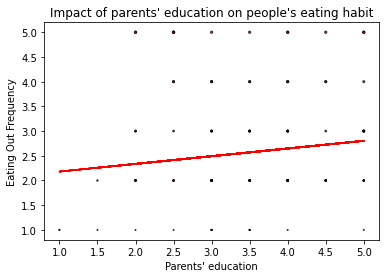

In [52]:
plt.scatter(food_data_cooking_df['average education of parents'], food_data_cooking_df["eating_out"], marker = "o", facecolors="red", edgecolors="black", s=food_data_cooking_df["eating_out"], alpha=.75)

(slope, intercept, rvalue, pvalue, stderr) = linregress(food_data_cooking_df['average education of parents'], food_data_cooking_df["eating_out"])

regress_values = food_data_cooking_df['average education of parents'] * slope + intercept

line_eq = f'y= {str(round(slope,2))}x + {str(round(intercept,2))}'

plt.plot(food_data_cooking_df['average education of parents'], regress_values, "r-")
plt.title("Impact of parents' education on people's eating habit")
plt.xlabel("Parents' education")
plt.ylabel("Eating Out Frequency")

print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.show()

#There is minimum relevance between a person's eating out habit and parents' education level, which is the higher level the parents' education is, the more often will people eat out

The r-squared is: 0.03580824435819679
The equation of the regression line is: y= 0.03x + 1.43


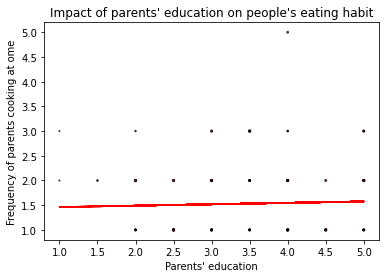

In [53]:
plt.scatter(food_data_cooking_df['average education of parents'], food_data_cooking_df["parents_cook"], marker = "o", facecolors="red", edgecolors="black", s=food_data_cooking_df["eating_out"], alpha=.75)

(slope, intercept, rvalue, pvalue, stderr) = linregress(food_data_cooking_df['average education of parents'], food_data_cooking_df["parents_cook"])

regress_values = food_data_cooking_df['average education of parents'] * slope + intercept

line_eq = f'y= {str(round(slope,2))}x + {str(round(intercept,2))}'

plt.plot(food_data_cooking_df['average education of parents'], regress_values, "r-")
plt.title("Impact of parents' education on people's eating habit")
plt.xlabel("Parents' education")
plt.ylabel("Frequency of parents cooking at ome")

print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.show()

#Most parents cook at home almost everyday or at least 2-3 times a week regardless of the education level

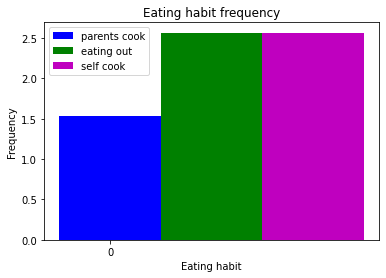

In [67]:
# data to plot
avg_parents_cook = food_data_cooking_df["parents_cook"].mean()
avg_eating_out = food_data_cooking_df["eating_out"].mean()
avg_self_cook = food_data_cooking_df["cook"].mean()

# create plot
fig, ax = plt.subplots()
bar_width = 0.2
X = np.arange(1)

p1 = plt.bar(X, avg_parents_cook, bar_width, color='b', label='parents cook')
p2 = plt.bar(X + bar_width, avg_eating_out, bar_width, color='g', label='eating out')
p3 = plt.bar(X + bar_width * 2, avg_eating_out, bar_width, color='m', label='self cook')

plt.xlabel('Eating habit')
plt.ylabel('Frequency')
plt.title('Eating habit frequency')
plt.xticks(X)
plt.legend()


plt.show()

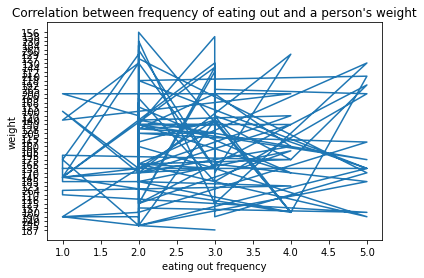

In [82]:
eating_out_xa = food_data_cooking_df["eating_out"]
weight_ya = food_data_cooking_df["weight"]
plt.plot(eating_out_xa, weight_ya)
plt.title("Correlation between frequency of eating out and a person's weight")
plt.xlabel("eating out frequency")
plt.ylabel("weight")
plt.show()
